### 다변량 정류 분포

In [1]:
import numpy as np

x = np.array([1, 2, 3])

print(x.__class__)
print(x.shape)
print(x.ndim)

<class 'numpy.ndarray'>
(3,)
1


In [2]:
W = np.array([[1, 2, 3], [4, 5, 6]])
print(W.ndim)
print(W.shape)

2
(2, 3)


In [4]:
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])

print(W + X)
print('-----')
print(W * X)

[[ 1  3  5]
 [ 7  9 11]]
-----
[[ 0  2  6]
 [12 20 30]]


In [6]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
y = np.dot(a, b)
print(y)

32


In [7]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
Y = np.dot(A, B)
print(Y)

[[19 22]
 [43 50]]


In [8]:
import numpy as np

A = np.array([[1,2,3], [4,5,6]])
print(A)
print('------')
print(A.T)

[[1 2 3]
 [4 5 6]]
------
[[1 4]
 [2 5]
 [3 6]]


In [9]:
A = np.array([[3,4], [5,6]])
d = np.linalg.det(A)
print(d)

-1.9999999999999971


In [10]:
A = np.array([[3,4], [5,6]])
B = np.linalg.inv(A)
print(B)
print('----')
print(A @ B)

[[-3.   2. ]
 [ 2.5 -1.5]]
----
[[ 1.0000000e+00 -8.8817842e-16]
 [ 0.0000000e+00  1.0000000e+00]]


In [11]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    iv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x-mu).T @ iv @ (x - mu) / -2.0)
    return y

In [12]:
x = np.array([[0], [0]])
mu = np.array([[1], [2]])
cov = np.array([[1, 0], [0, 1]])
y = multivariate_normal(x, mu, cov)
print(y)

[[0.01306423]]


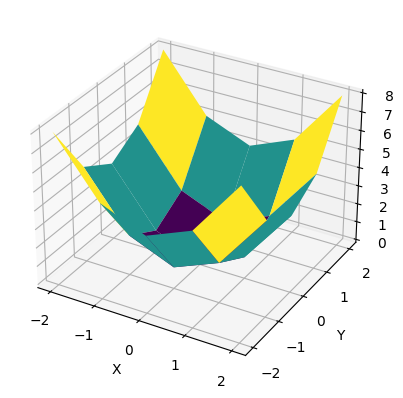

In [14]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2]])
Y = np.array([[-2, -2, -2, -2, -2],
              [-1, -1, -1, -1, -1],
              [0, 0, 0, 0, 0],
              [1, 1, 1, 1, 1],
              [2, 2, 2, 2, 2]])

Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

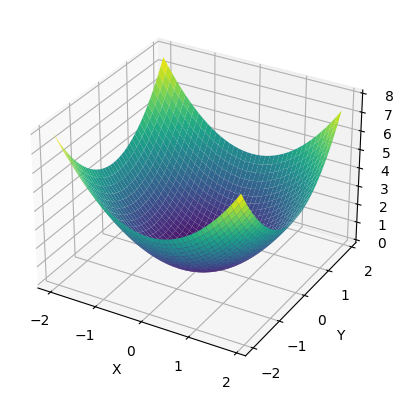

In [15]:
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(xs, ys)
Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

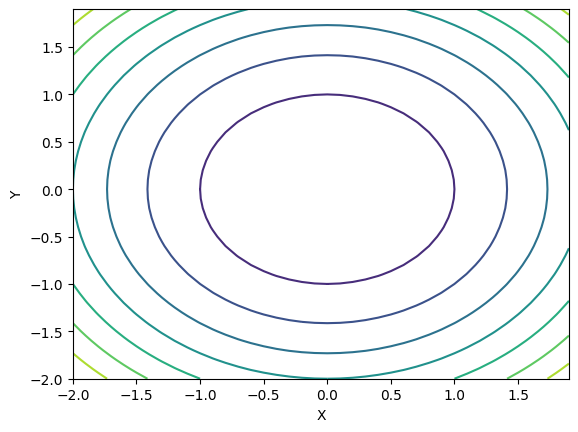

In [16]:
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
Z = X ** 2 + Y ** 2

ax = plt.axes()
ax.contour(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

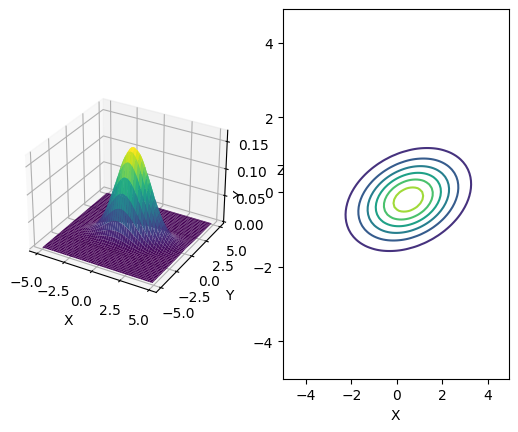

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    iv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x-mu).T @ iv @ (x - mu) / -2.0)
    return y

mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3], [0.3, 0.5]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure()

ax1 = fig.add_subplot(1,2, 1, projection='3d')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.contour(X, Y, Z)
plt.show()

In [67]:
import numpy as np

np.random.seed(0)

N = 10000
D = 2
xs = np.random.randn(N, D)

mu = np.sum(xs, axis=0)
mu /= N

cov = 0

for n in range(N):
    x= xs[n]
    z = x - mu
    z = z[:, np.newaxis]
    cov += z * z.T

cov /= N

print(mu)
print(cov)

[-0.01048639  0.00304068]
[[0.98986334 0.00487719]
 [0.00487719 0.97190356]]


In [68]:
import os
import numpy as np
import matplotlib.pyplot as plt

path = os.path.join(os.getcwd(), 'height_weight.txt')
xs = np.loadtxt(path)

print(xs.shape)

(25000, 2)


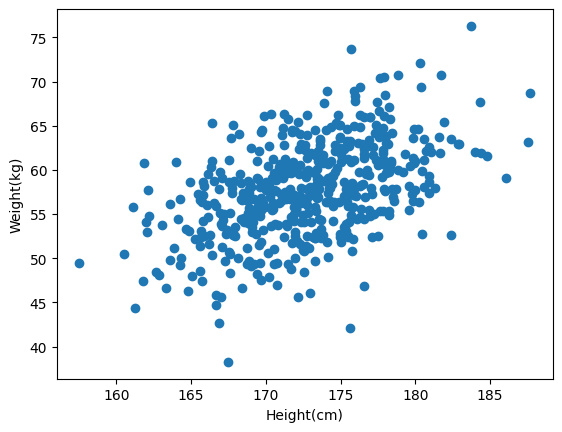

In [71]:
small_xs = xs[:500]
plt.scatter(small_xs[:, 0], small_xs[:, 1])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.show()

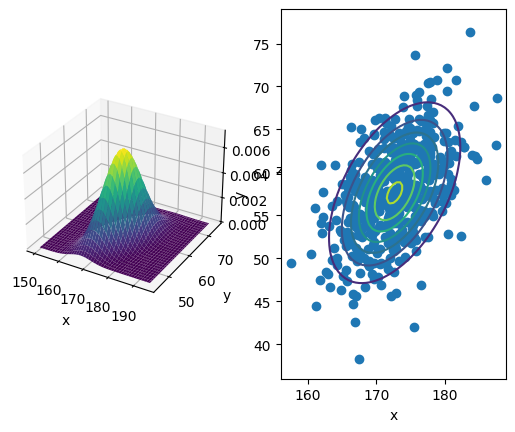

In [72]:

import os
import numpy as np
import matplotlib.pyplot as plt

path = os.path.join(os.getcwd(), 'height_weight.txt')
xs = np.loadtxt(path)

# Maximum Likelihood Estimation(MLE)
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

small_xs = xs[:500]
X, Y = np.meshgrid(np.arange(150, 195, 0.5),
                   np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(small_xs[:,0], small_xs[:,1])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z)
plt.show()
